In [92]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [93]:
df=pd.read_csv('ecosystem_data.csv')
df.head()

,water_quality,air_quality_index,biodiversity_index,vegetation_cover,soil_ph,ecosystem_health
0,37.454012,112.092246,0.729998,63.814457,5.144016,degraded
1,95.071431,99.873629,0.184512,45.929245,4.021498,degraded
2,73.199394,52.846174,0.346640,96.449852,4.194976,degraded
3,59.865848,182.180001,0.663281,21.897845,4.493691,degraded
4,15.601864,142.987248,0.482089,58.785642,4.620093,degraded


In [94]:
df.columns

Index(['water_quality', 'air_quality_index', 'biodiversity_index',
       'vegetation_cover', 'soil_ph', 'ecosystem_health'],
      dtype='object')

In [95]:
df.describe()

,water_quality,air_quality_index,biodiversity_index,vegetation_cover,soil_ph
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,49.415956,151.358963,0.500050,49.871338,6.232751
std,28.763013,86.788365,0.286774,28.899459,1.591063
min,0.001163,0.047323,0.000048,0.000554,3.500092
25%,24.632887,76.183740,0.253748,24.685725,4.843497
50%,49.252862,151.769033,0.502068,50.003024,6.215445
75%,74.000635,226.943766,0.744674,74.711625,7.627624
max,99.971767,299.977448,0.999901,99.978937,8.999847


In [96]:
df.isna().sum()

water_quality         0
air_quality_index     0
biodiversity_index    0
vegetation_cover      0
soil_ph               0
ecosystem_health      0
dtype: int64

In [97]:
df["ecosystem_health"].value_counts()

ecosystem_health
degraded    8761
at risk     1120
healthy      119
Name: count, dtype: int64

In [98]:
df["ecosystem_health"].unique()

array(['degraded', 'at risk', 'healthy'], dtype=object)

In [99]:
df["ecosystem_health"]=df["ecosystem_health"].map({"healthy":0,"at risk":1,"degraded":2})

In [100]:
# Features and target variable
x = df[['water_quality', 'air_quality_index', 'biodiversity_index', 'vegetation_cover','soil_ph']]
y = df['ecosystem_health']

In [101]:
df

,water_quality,air_quality_index,biodiversity_index,vegetation_cover,soil_ph,ecosystem_health
0,37.454012,112.092246,0.729998,63.814457,5.144016,2
1,95.071431,99.873629,0.184512,45.929245,4.021498,2
2,73.199394,52.846174,0.346640,96.449852,4.194976,2
3,59.865848,182.180001,0.663281,21.897845,4.493691,2
4,15.601864,142.987248,0.482089,58.785642,4.620093,2
...,...,...,...,...,...,...
9995,85.765599,263.111589,0.952275,75.403391,6.923449,2
9996,89.750884,14.044187,0.747824,76.452694,4.744065,1
9997,94.670792,91.109541,0.019456,26.956943,7.619473,2
9998,39.748799,132.996002,0.401005,43.431977,6.365560,2


In [102]:
# Split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [103]:
# Step 4: Apply Naive Bayes (Gaussian)
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [104]:
# Step 5: Predict
y_pred = model.predict(x_test)

In [105]:
# Step 6: Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9515
Confusion Matrix:
 [[   6   15    0]
 [   1  140   81]
 [   0    0 1757]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.29      0.43        21
           1       0.90      0.63      0.74       222
           2       0.96      1.00      0.98      1757

    accuracy                           0.95      2000
   macro avg       0.91      0.64      0.72      2000
weighted avg       0.95      0.95      0.95      2000



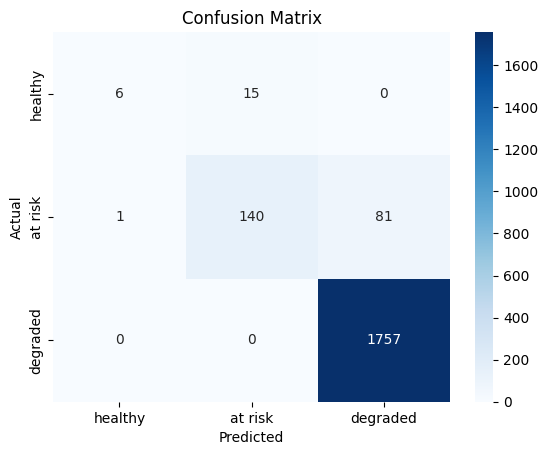

In [110]:
conf_mat = confusion_matrix(y_test,y_pred)
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues',xticklabels=['healthy','at risk','degraded'], yticklabels=['healthy','at risk','degraded'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [111]:
# Reverse class mapping dictionary
class_names = {0: "healthy", 1: "at risk", 2: "degraded"}

# Take input
wq = float(input("Enter the water quality: "))
aqi = float(input("Enter AQI: "))
bdi = float(input("Enter BDI: "))
vc = float(input("Enter the vegetation cover: "))
sph = float(input("Enter the Soil PH: "))

# Make prediction
new_data = np.array([[wq, aqi, bdi, vc, sph]])
predicted_class = model.predict(new_data)[0]  # returns 0, 1, or 2

# Map to class label
predicted_label = class_names[predicted_class]

# Display result
print(f"The Ecosystem Health for water quality {wq}, AQI {aqi}, BDI {bdi}, Vegetation Cover {vc}, Soil PH {sph} is '{predicted_label}'")


Enter the water quality:  60
Enter AQI:  150
Enter BDI:  0.6
Enter the vegetation cover:  65
Enter the Soil PH:  6


The Ecosystem Health for water quality 60.0, AQI 150.0, BDI 0.6, Vegetation Cover 65.0, Soil PH 6.0 is 'degraded'


C:\Users\RENUKA\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [60]:
import joblib

In [107]:
joblib.dump(model, 'ecosystem.pkl')

['ecosystem.pkl']